In [240]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

print("ready")

ready


In [241]:
data = pd.read_csv('../input/ex1data1.txt', sep= ',', header=None)
data.head()
data.columns

Int64Index([0, 1], dtype='int64')

          0
0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
5    8.3829
6    7.4764
7    8.5781
8    6.4862
9    5.0546
10   5.7107
11  14.1640
12   5.7340
13   8.4084
14   5.6407
15   5.3794
16   6.3654
17   5.1301
18   6.4296
19   7.0708
20   6.1891
21  20.2700
22   5.4901
23   6.3261
24   5.5649
25  18.9450
26  12.8280
27  10.9570
28  13.1760
29  22.2030
..      ...
67  10.2360
68   5.4994
69  20.3410
70  10.1360
71   7.3345
72   6.0062
73   7.2259
74   5.0269
75   6.5479
76   7.5386
77   5.0365
78  10.2740
79   5.1077
80   5.7292
81   5.1884
82   6.3557
83   9.7687
84   6.5159
85   8.5172
86   9.1802
87   6.0020
88   5.5204
89   5.0594
90   5.7077
91   7.6366
92   5.8707
93   5.3054
94   8.2934
95  13.3940
96   5.4369

[97 rows x 1 columns]


Text(0, 0.5, 'Profit in 10 Ks')

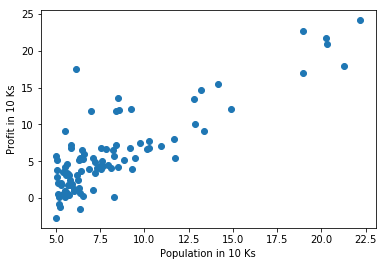

In [242]:
X = pd.DataFrame(data[0])
print(X)
y = data[1]
m = y.shape[0]
plt.scatter(X, y)
plt.xlabel("Population in 10 Ks")
plt.ylabel("Profit in 10 Ks")

# 1-  one variable linear regression

In [243]:
#add a column of ones in X in order to simulate the first feature / interceptor and create a dataframe for X
def initialize_dataset(X):
    X_test = pd.DataFrame()
    X_test[0] = np.ones(m)
    for col in X.columns:
        X_test[col + 1] = X[col]
    return X_test
X_test = initialize_dataset(X)
X_test.head()

,0,1
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


In [244]:
#initaliaze parameters for linear regression, iterations and learning rate
def initialize_parameters(X, iterations, learning_rate):
    theta = pd.Series(np.zeros(X.shape[1]))
    iterations = iterations
    alpha = learning_rate
    return theta, iterations, alpha
theta, iterations, alpha = initialize_parameters(X_test, 1500, 0.01)


In [245]:
def compute_predictions(X, theta):
    return X.dot(theta)

In [246]:
#create the cost function
def compute_cost(X, y, theta):
    predictions = compute_predictions(X, theta)
    return (predictions - y).pow(2).sum()/ (2 * m)
cost = compute_cost(X_test, y, theta)
print(cost)

32.072733877455676


In [248]:
#gradient descent implementation
theta, iterations, alpha = initialize_parameters(X_test, 1500, 0.01)
def fit_model(X, y, theta, alpha, iterations):
    list_of_cost = []
    for i in range(iterations):
        predictions = compute_predictions(X, theta)
        #update theta parameters on each iteration
        theta = theta - (alpha / m) * X.T.dot(predictions - y)
        #save the cost on each iterations to plot later
        list_of_cost.append(compute_cost(X, y, theta))
    cost_history = pd.DataFrame({"number_of_iterations": range(iterations), "cost": list_of_cost})
    return theta, cost_history
theta, cost_history = fit_model(X_test, y, theta, alpha, iterations)

Text(0, 0.5, 'Cost')

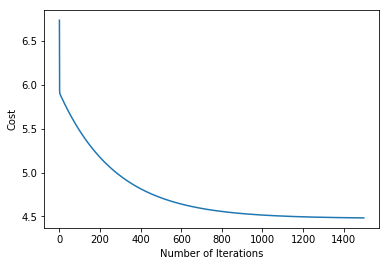

In [249]:
#see the cost evolution 
cost_history["cost"].plot.line()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

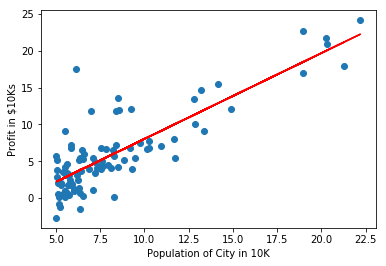

In [250]:
#plot the regression line
predictions = compute_predictions(X_test, theta)
plt.scatter(X, y)
plt.xlabel('Population of City in 10K')
plt.ylabel('Profit in $10Ks')
plt.plot(X, predictions, color="red")


# 2 - multivariate linear regression

In [251]:
data_2 = pd.read_csv('../input/ex1data2.txt', sep= ',', header=None)
data_2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [252]:
#Set up X and y datasets
last_column = data_2.columns[-1]
X = data_2.drop(last_column, axis=1)
y = data_2[last_column]
m = y.shape[0]

In [253]:
#Normalize feature
def normalize_features(X):
    means = X.mean()
    X = X - X.mean()
    deviation = X.std()
    X = X / X.std()
    return X, means, deviation
X, means, deviation = normalize_features(X)
print(X.head(), means, deviation)

          0         1
0  0.130010 -0.223675
1 -0.504190 -0.223675
2  0.502476 -0.223675
3 -0.735723 -1.537767
4  1.257476  1.090417 0    2000.680851
1       3.170213
dtype: float64 0    794.702354
1      0.760982
dtype: float64


In [258]:
#fit the model
X_test = initialize_dataset(X)
theta, iterations, alpha = initialize_parameters(X_test, 50, 0.5)
X_test.head()


,0,1,2
0,1.0,0.130010,-0.223675
1,1.0,-0.504190,-0.223675
2,1.0,0.502476,-0.223675
3,1.0,-0.735723,-1.537767
4,1.0,1.257476,1.090417


Text(0, 0.5, 'Cost')

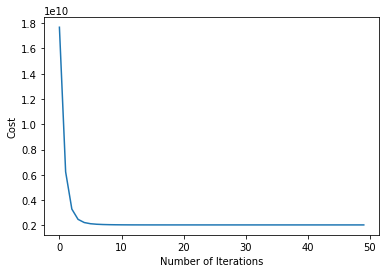

In [259]:
theta, cost_history = fit_model(X_test, y, theta, alpha, iterations)
cost_history["cost"].plot.line()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")